# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Daniel Dolrie Simanjuntak
- **Email:** danielsimanjuntak2305@gmail.com
- **ID Dicoding:** dolrie23

# Menentukan Pertanyaan Bisnis

- Pertanyaan 1:  Bagaimana musim mempengaruhi tren pengguna bike sharing?
- Pertanyaan 2:  Bagaimana perbedaan karakteristik pengguna tipe casual dan registered antara hari kerja dan akhir pekan?
- Pertanyaan 3:  Berdasarkan data setiap jamnya bagaimana karakteristik pengguna casual vs registered dan kapan sebaiknya melakukan promosi?

## Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [2]:
day_data = pd.read_csv('D:\Data_Science_Dicoding\Data_Science_py\Tugas\submission\data\day.csv')
hour_data = pd.read_csv('D:\Data_Science_Dicoding\Data_Science_py\Tugas\submission\data\hour.csv')

In [3]:
day_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
hour_data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Dari data tersebut dapat dilihat bahwa terdapat dua tabel pemakaian bike sharing dengan atribut hampir sama kecuali atribut hour pada dataset day.csv tidak mencantumkan pemakaian bike sharing dalam satuan jam. 
- Dataset tersebut terdiri dari 16 atribut penting untuk nantinya dianalisis. Atribut tersebut terdiri dari: Date, Season, year, month, hour, holiday, weekday, workingday, weather situation, temperature measured, feeling temperature, humidity, windspeed, casual user, registered user, count(total).

### Assessing Data

In [5]:
day_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [6]:
day_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
hour_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [10]:
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
day_data.duplicated().sum()

np.int64(0)

In [12]:
hour_data.duplicated().sum()

np.int64(0)

In [13]:
day_data.info()
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

**Insight:**
- Data relatif sangat baik dan tidak ada ditemukan missing data atapun nilai null.
- Tidak ditemukan data duplikat.
- Tidak ditemukan data invalid atau tidak masuk akal.
- Data yang ada diatas konsisten dan tidak ditemukan outlier.
- Data yang terdapat pada kolom count sudah sama dengan total dari penjumlahan casual dan registered
- Dibalik data yang cukup baik tersebut kita juga mendapatkan atribut data yang unfunctional maka saya akan membuang beberapa atribut tersebut.
- Saya juga melihat bahwa dataset hour lebih baik merepresentasikan keseluruhan data sehingga saya hanya akan membawa hour.csv untuk dianalisis.


### Cleaning Data

In [14]:
# mengubah dt ke datetime format
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [15]:
# Editing data and replace
hour_data['temp'] = hour_data['temp'] * 41
hour_data['atemp'] = hour_data['atemp'] * 50
hour_data['hum'] = hour_data['hum'] * 100
hour_data['windspeed'] = hour_data['windspeed'] * 67
hour_data.weathersit.replace((1,2,3,4), ('Good', 'Not Good', 'Nearly Bad', 'Extreme'), inplace=True)
hour_data.season.replace((1,2,3,4), ('Springer', 'Summer', 'Fall', 'Winter'), inplace=True)
hour_data.holiday.replace((0,1), ('No', 'Yes'), inplace=True)
hour_data.weekday.replace((0,1,2,3,4,5,6), ('Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'), inplace=True)
hour_data.workingday.replace((0,1), ('No', 'Yes'), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_17336\1945212304.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hour_data.weathersit.replace((1,2,3,4), ('Good', 'Not Good', 'Nearly Bad', 'Extreme'), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17336\1945212304.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

In [16]:
# Rename Atribute
hour_data.rename(columns={
    "instant": "id",
    "season": "Season",
    "hr": "Hour",
    "yr": "Year",
    "mnth": "Month",
    "holiday": "Holiday",
    "weekday": "Days",
    "workingday": "Workdays",
    "weathersit": "Weather",
    "temp": "Temp",
    "atemp": "TempFeeled",
    "hum": "Humidity",
    "windspeed": "Windspeed",
    "casual": "Casual",
    "registered": "Registered",
    "cnt": "Total User"
}, inplace=True)

In [17]:
# hour_data['Hour'] = pd.to_datetime(hour_data['hr'], format='%H').dt.time
# print(hour_data['Hour'].info())

In [18]:
# hour_data.drop(['hr'],axis=1, inplace=True)

In [19]:
hour_data.drop(['Year'],axis=1, inplace=True)
hour_data.drop(['Month'],axis=1, inplace=True)

In [20]:
hour_data

,id,dteday,Season,Hour,Holiday,Days,Workdays,Weather,Temp,TempFeeled,Humidity,Windspeed,Casual,Registered,Total User
0,1,2011-01-01,Springer,0,No,Sat,No,Good,9.84,14.395,81.0,0.0000,3,13,16
1,2,2011-01-01,Springer,1,No,Sat,No,Good,9.02,13.635,80.0,0.0000,8,32,40
2,3,2011-01-01,Springer,2,No,Sat,No,Good,9.02,13.635,80.0,0.0000,5,27,32
3,4,2011-01-01,Springer,3,No,Sat,No,Good,9.84,14.395,75.0,0.0000,3,10,13
4,5,2011-01-01,Springer,4,No,Sat,No,Good,9.84,14.395,75.0,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Springer,19,No,Mon,Yes,Not Good,10.66,12.880,60.0,11.0014,11,108,119
17375,17376,2012-12-31,Springer,20,No,Mon,Yes,Not Good,10.66,12.880,60.0,11.0014,8,81,89
17376,17377,2012-12-31,Springer,21,No,Mon,Yes,Good,10.66,12.880,60.0,11.0014,7,83,90
17377,17378,2012-12-31,Springer,22,No,Mon,Yes,Good,10.66,13.635,56.0,8.9981,13,48,61


**Insight:**
- Data dteday diubah dari object ke bentuk datetime
- Data temp, atemp, humidity, dan windspeed saya kembalikan ke bentuk awal (denormalisasi) agar memudahkan analisis.
- Data yang sifatnya nominal saya ubah kedalam bentuk categorial agar memudahkan dalam membuat visualisasi.
- Data yang tidak signifikan seperti tahun, bulan, jam saya drop karena sudah direpresentasikan oleh dteday.

## Exploratory Data Analysis (EDA)

### Explore ...

In [21]:
hour_data.skew(numeric_only=True)

id            0.000000
Hour         -0.010680
Temp         -0.006021
TempFeeled   -0.090429
Humidity     -0.111287
Windspeed     0.574905
Casual        2.499237
Registered    1.557904
Total User    1.277412
dtype: float64

In [22]:
hour_data.describe(include='all') #Suhu, Dingin:17, Normal:24, Panas: 30 

,id,dteday,Season,Hour,Holiday,Days,Workdays,Weather,Temp,TempFeeled,Humidity,Windspeed,Casual,Registered,Total User
count,17379.0000,17379,17379,17379.000000,17379,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,2,7,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,No,Sat,Yes,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,16879,2512,11865,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,11.546752,NaN,NaN,NaN,NaN,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,0.000000,NaN,NaN,NaN,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,6.000000,NaN,NaN,NaN,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,12.000000,NaN,NaN,NaN,NaN,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,18.000000,NaN,NaN,NaN,NaN,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,23.000000,NaN,NaN,NaN,NaN,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


In [23]:
# Pivot table-1: Total Pengguna Berdasarkan 4 Musim
hour_data.groupby(by=['Season']).agg({
    'Casual': ['sum'],
    'Registered': ['sum'],
    'Total User': ['sum']
})

,Casual,Registered,Total User
,sum,sum,sum
Season,,,
Fall,226091,835038,1061129
Springer,60622,410726,471348
Summer,203522,715067,918589
Winter,129782,711831,841613


In [24]:
# Pivot table-2: Rerata Pengguna Berdasarkan 4 Musim
hour_data.groupby(by=['Season']).agg({
    'Casual': 'mean',
    'Registered': 'mean',
    'Total User': 'mean',
})

,Casual,Registered,Total User
Season,,,
Fall,50.287144,185.729093,236.016237
Springer,14.290901,96.823668,111.114569
Summer,46.160581,162.183488,208.344069
Winter,30.666824,168.202032,198.868856


In [25]:
# Pivot table-3: Rerata Pengguna Berdasarkan 4 Situasi Cuaca
hour_data.groupby(by=['Weather']).agg({
    'Casual': 'sum',
    'Registered': 'sum',
    'Total User': 'sum',
})

,Casual,Registered,Total User
Weather,,,
Extreme,8,215,223
Good,462745,1875428,2338173
Nearly Bad,22783,135548,158331
Not Good,134481,661471,795952


In [26]:
# Pivot table-4: Rerata Pengguna Berdasarkan Hari Kerja
hour_data.groupby(by=['Workdays']).agg({
    'Casual': 'sum',
    'Registered': 'sum',
    'Total User': 'sum',
})

,Casual,Registered,Total User
Workdays,,,
No,316732,683537,1000269
Yes,303285,1989125,2292410


In [27]:
# Pivot table-5: Rerata Pengguna Berdasarkan Holiday
hour_data.groupby(by=['Holiday']).agg({
    'Casual': 'sum',
    'Registered': 'sum',
    'Total User': 'sum',
})

,Casual,Registered,Total User
Holiday,,,
No,597658,2616586,3214244
Yes,22359,56076,78435


In [28]:
hour_data['Holiday'].value_counts()

Holiday
No     16879
Yes      500
Name: count, dtype: int64

In [29]:
hour_data['Workdays'].value_counts()

Workdays
Yes    11865
No      5514
Name: count, dtype: int64

In [30]:
# Table Agregasi suhu 
# Suhu didapatkan dari nilai percentile temperature yang  (TempFeeled), yaitu: Dingin(17), Normal(24), Panas(30)
hour_data['Suhu'] = hour_data.TempFeeled.apply(lambda x: 'Dingin' if x <= 17 else ('Normal' if x>30 else 'Panas'))
hour_data.groupby(by='Suhu').id.nunique().sort_values(ascending=True)

Suhu
Dingin    4762
Normal    5279
Panas     7338
Name: id, dtype: int64

In [31]:
# Pivot table-6: Total Pengguna berdasarkan suhu
Suhu_data = hour_data.groupby(by=['Suhu']).agg({
    'Casual': 'mean',
    'Registered': 'mean',
    'Total User': 'mean',
})
Suhu_data.sort_values(by='Suhu', ascending=True) 

,Casual,Registered,Total User
Suhu,,,
Dingin,9.217766,90.537379,99.755145
Normal,68.329987,223.459936,291.789922
Panas,29.355138,144.709458,174.064595


In [32]:
# Pivot table-7: Total Pengguna berdasarkan Jam setiap hari
hour_data.groupby(by=['Hour']).agg({
    'Casual': 'sum',
    'Registered': 'sum',
    'Total User': 'sum',
}).sort_values(by='Total User', ascending=True)

,Casual,Registered,Total User
Hour,,,
4,874,3554,4428
3,1893,6281,8174
5,1012,13249,14261
2,3412,12940,16352
1,4709,19455,24164
0,7375,31755,39130
6,3017,52115,55132
23,11065,52876,63941
22,16200,79412,95612


In [33]:
# Pivot table-8: Total Pengguna berdasarkan hari
hour_data.groupby(by=['Days']).agg({
    'Casual': 'sum',
    'Registered': 'sum',
    'Total User': 'sum',
}).sort_values(by='Total User', ascending=True)

,Casual,Registered,Total User
Days,,,
Sun,140521,303506,444027
Mon,70784,384719,455503
Tue,57843,411266,469109
Wed,57319,415729,473048
Sat,153852,323955,477807
Thu,61460,423935,485395
Fri,78238,409552,487790


In [34]:
# Pivot table-9: Total Pengguna Tahunan
hour_data.groupby(by=hour_data['dteday'].dt.year).agg({
    'Casual': 'sum',
    'Registered': 'sum',
    'Total User': 'sum'
})

,Casual,Registered,Total User
dteday,,,
2011,247252,995851,1243103
2012,372765,1676811,2049576


**Insight:**

***Dataset Hour***
- Dari hasil distribusi skewness, diperoleh insight bahwa dataset hour bagian atribut weekday terdistribusi miring ke kiri daripada dataset day_data. Hal tersebut membuktikan bahwa dataset hour_data pengguna bike sharing lebih banyak pada hari senin, selasa, rabu, kamis.
- Dari pivot table-1, diperoleh insight bahwa user terbanyak ada pada saat musim gugur dengan total user: 1061129. 
- Dari pivot table-2, diperoleh insight bahwa rata-rata user tidak menggunakan jasa bike sharing di musim semi. Hal tersebut mungkin dapat dikaitkan dengan data weather untuk mendeteksi total pengguna pada setiap weather situation di setiap musim. Apakah ada kejanggalan data atau tidak. Dapat dengan menggunakan pembagian data per musim ataupun analisis secara plot line.
- Dari pivot table-3, diperoleh insight bahwa memang benar manusia yang menggunakan bike sharing adalah normal karena karakteristik pengguna bersesuaian dengan situasi cuaca. Menariknya, pada cuaca nearly bad(Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) pengguna masih tetap menggunakan bike sharing.
- Dari pivot table-4, diperoleh insight bahwa pengguna bike sharing lebih banyak menggunakan jasa pada saat hari kerja. Namun, menariknya pengguna registered menyumbang lebih banyak data untuk pengguna hari kerja daripada casual. Sehingga, grafik line nantinya berkemungkinan ada perbedaan yang cukup signifikan antara pengguna casual dan registered di weekday vs weekend.
- Dari pivot table-5, diperoleh insight yang mematahkan pendapat pivot table-4, dimana seharusnya pengguna bike sharing hari kerja mendominasi daripada hari libur. Namun, jika berdasarkan data Holiday, Hari libur justru diminati pengguna bike sharing. Dari sini dapat disimpulkan bahwa ada ambiguitas yang timbul oleh karena dua persepsi mengenai hari libur. Oleh karena itu, saya hanya akan berpatokan pada Pivot table-5 dengan mengandalkan perhitungan hari libur berdasarkan Hari Kerja dalam satu minggu.
- Dari pivot table-6, diperoleh insight pengguna yang lebih dominan ketika suhu diluar ruangan pada saat Normal atau berkisar antara 17 hingga 31 derajat Celcius. Benchmark tersebut dibagi menggunakan patokan persentil data TempFeeled. 
- Dari pivot table-7, diperoleh insight bahwa pengguna bike sharing paling tinggi di jam 17.00 dan paling sedikit di jam 04.00.
- Dari pivot table-8, diperoleh insight bahwa pengguna bike sharing lebih dominan di hari Jumat
- Dari pivot table-9, diperoleh insight bahwa pengguna bike sharing paling tinggi di tahun 2012.

## Visualization & Explanatory Analysis

In [35]:
sns.set_palette("bright")

### Pertanyaan 1: Bagaimana weather situation, dan musim mempengaruhi perilaku pengguna bike sharing?

In [36]:
seasonal = hour_data.groupby('Season').agg({
    'Casual': 'sum',
    'Registered': 'sum',
    'Total User': 'sum'
})
seasonal

,Casual,Registered,Total User
Season,,,
Fall,226091,835038,1061129
Springer,60622,410726,471348
Summer,203522,715067,918589
Winter,129782,711831,841613


In [37]:
weather = hour_data.groupby(['Weather']).agg({
    'Casual': 'sum',
    'Registered': 'sum',
    'Total User': 'sum'
})
weather

,Casual,Registered,Total User
Weather,,,
Extreme,8,215,223
Good,462745,1875428,2338173
Nearly Bad,22783,135548,158331
Not Good,134481,661471,795952


In [38]:
bar_width = 0.25
x_season = np.arange(len(seasonal))
x_weather = np.arange(len(weather))
season_list = seasonal.index.tolist()
weather_list = weather.index.tolist()

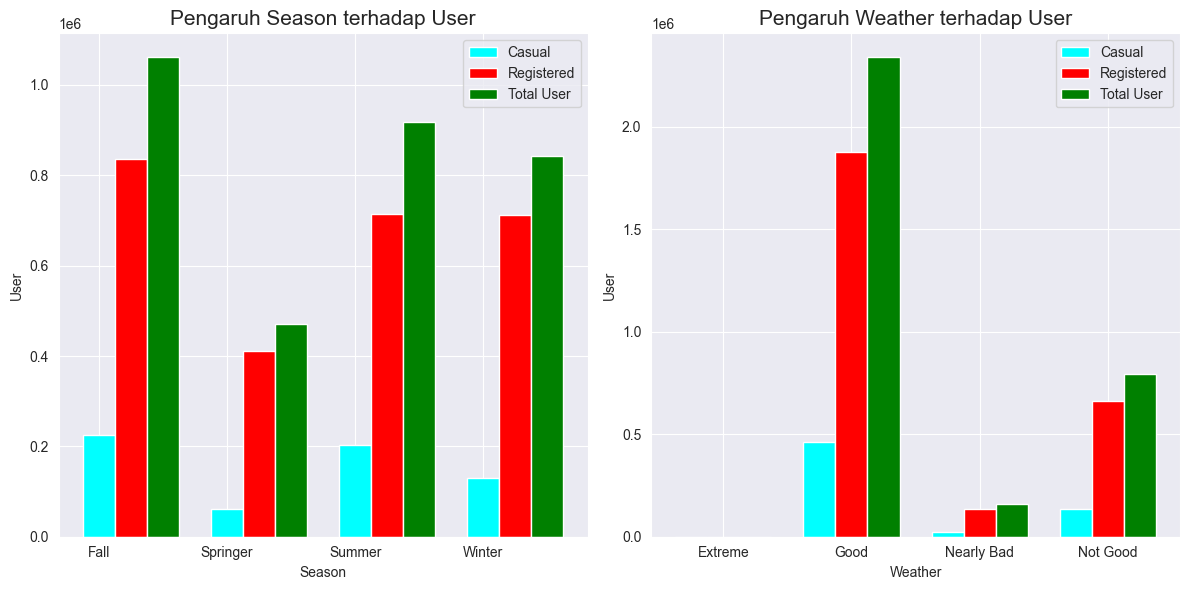

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot untuk Season
axes[0].bar(x_season, seasonal['Casual'], width=bar_width, label='Casual', color='cyan', align='center')
axes[0].bar(x_season + bar_width, seasonal['Registered'], width=bar_width, label='Registered', color='red', align='center')
axes[0].bar(x_season + 2 * bar_width, seasonal['Total User'], width=bar_width, label='Total User', color='green', align='center')

axes[0].set_title('Pengaruh Season terhadap User', size=15)
axes[0].set_xlabel('Season')
axes[0].set_ylabel('User')
axes[0].set_xticks(x_season)
axes[0].set_xticklabels(season_list)
axes[0].legend()

# Plot untuk Weather
axes[1].bar(x_weather, weather['Casual'], width=bar_width, label='Casual', color='cyan', align='center')
axes[1].bar(x_weather + bar_width, weather['Registered'], width=bar_width, label='Registered', color='red', align='center')
axes[1].bar(x_weather + 2 * bar_width, weather['Total User'], width=bar_width, label='Total User', color='green', align='center')

axes[1].set_title('Pengaruh Weather terhadap User', size=15)
axes[1].set_xlabel('Weather')
axes[1].set_ylabel('User')
axes[1].set_xticks(x_weather + bar_width)
axes[1].set_xticklabels(weather_list)
axes[1].legend()

# Hasil plot
plt.tight_layout()
plt.show()

**Insight:**
1. Dapat dilihat bahwa Keseluruhan pengguna lumayan dipengaruhi oleh musim dan weather. Melalui grafik total user dapat dilihat bahwa pada saat musim gugur adalah pengguna tertinggi tercatat sebesar **1.061.129** user. Sedangkan paling rendah ada di musim semi sebesar **471.348** user.
2. Kondisi cuaca terbaik bagi pengguna menggunakan jasa bike sharing adalah saat cuaca Clear, Few clouds, Partly cloudy, Partly cloudy. Sebaliknya saat cuaca ekstrem (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) sudah pasti user tidak melakukan aktifitas diluar ruangan dan tercermin dari grafik yang tertinggal jauh dari Good. Adapun total user yang tercatat menggunakan bike sharing adalah sebesar 223. Hal tersebut juga bisa jadi bias dari database atau perbedaan cuaca secara general dengan users tersebut. 

### Pertanyaan 2:  Bagaimana perbedaan jumlah pengguna antara hari kerja dan akhir pekan?

In [40]:
workingday_data = hour_data[hour_data['Workdays'] == 'Yes']
weekend_data = hour_data[hour_data['Workdays'] == 'No']  

In [41]:
# workingday_data['Hour'] = pd.to_datetime(workingday_data['Hour'], format='%H:%M:%S').dt.time

In [42]:
workingday_data

,id,dteday,Season,Hour,Holiday,Days,Workdays,Weather,Temp,TempFeeled,Humidity,Windspeed,Casual,Registered,Total User,Suhu
47,48,2011-01-03,Springer,0,No,Mon,Yes,Good,9.02,9.850,44.0,23.9994,0,5,5,Dingin
48,49,2011-01-03,Springer,1,No,Mon,Yes,Good,8.20,8.335,44.0,27.9993,0,2,2,Dingin
49,50,2011-01-03,Springer,4,No,Mon,Yes,Good,6.56,6.820,47.0,26.0027,0,1,1,Dingin
50,51,2011-01-03,Springer,5,No,Mon,Yes,Good,6.56,6.820,47.0,19.0012,0,3,3,Dingin
51,52,2011-01-03,Springer,6,No,Mon,Yes,Good,5.74,5.305,50.0,26.0027,0,30,30,Dingin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Springer,19,No,Mon,Yes,Not Good,10.66,12.880,60.0,11.0014,11,108,119,Dingin
17375,17376,2012-12-31,Springer,20,No,Mon,Yes,Not Good,10.66,12.880,60.0,11.0014,8,81,89,Dingin
17376,17377,2012-12-31,Springer,21,No,Mon,Yes,Good,10.66,12.880,60.0,11.0014,7,83,90,Dingin
17377,17378,2012-12-31,Springer,22,No,Mon,Yes,Good,10.66,13.635,56.0,8.9981,13,48,61,Dingin


In [43]:
weekend_data

,id,dteday,Season,Hour,Holiday,Days,Workdays,Weather,Temp,TempFeeled,Humidity,Windspeed,Casual,Registered,Total User,Suhu
0,1,2011-01-01,Springer,0,No,Sat,No,Good,9.84,14.395,81.0,0.0000,3,13,16,Dingin
1,2,2011-01-01,Springer,1,No,Sat,No,Good,9.02,13.635,80.0,0.0000,8,32,40,Dingin
2,3,2011-01-01,Springer,2,No,Sat,No,Good,9.02,13.635,80.0,0.0000,5,27,32,Dingin
3,4,2011-01-01,Springer,3,No,Sat,No,Good,9.84,14.395,75.0,0.0000,3,10,13,Dingin
4,5,2011-01-01,Springer,4,No,Sat,No,Good,9.84,14.395,75.0,0.0000,0,1,1,Dingin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17350,17351,2012-12-30,Springer,19,No,Sun,No,Good,13.94,18.180,61.0,0.0000,16,86,102,Panas
17351,17352,2012-12-30,Springer,20,No,Sun,No,Good,9.02,9.850,47.0,22.0028,9,63,72,Dingin
17352,17353,2012-12-30,Springer,21,No,Sun,No,Good,8.20,10.605,51.0,11.0014,5,42,47,Dingin
17353,17354,2012-12-30,Springer,22,No,Sun,No,Good,8.20,9.850,55.0,12.9980,6,30,36,Dingin


In [44]:
# Casual User
workingday_avg_casual = workingday_data.groupby('Hour')['Casual'].mean().reset_index()
weekend_avg_casual = weekend_data.groupby('Hour')['Casual'].mean().reset_index()
weekend_avg_casual

,Hour,Casual
0,0,16.647826
1,1,12.504348
2,2,10.399123
3,3,6.453744
4,4,2.264317
5,5,1.725225
6,6,3.820961
7,7,8.606061
8,8,20.424242
9,9,45.017316


In [45]:
# Registered User
workingday_avg_registered = workingday_data.groupby('Hour')['Registered'].mean().reset_index()
weekend_avg_registered = weekend_data.groupby('Hour')['Registered'].mean().reset_index()
workingday_avg_registered

,Hour,Registered
0,0,29.637097
1,1,12.842105
2,2,6.546201
3,3,4.031915
4,4,4.663830
5,5,23.642424
6,6,98.181452
7,7,278.417339
8,8,454.741935
9,9,217.205645


In [46]:
# Total User
workingday_avg_total = workingday_data.groupby('Hour')['Total User'].mean().reset_index()
weekend_avg_total = weekend_data.groupby('Hour')['Total User'].mean().reset_index()
weekend_avg_total

,Hour,Total User
0,0,90.800000
1,1,69.508696
2,2,53.171053
3,3,25.775330
4,4,8.264317
5,5,8.689189
6,6,18.742358
7,7,43.406926
8,8,105.653680
9,9,171.623377


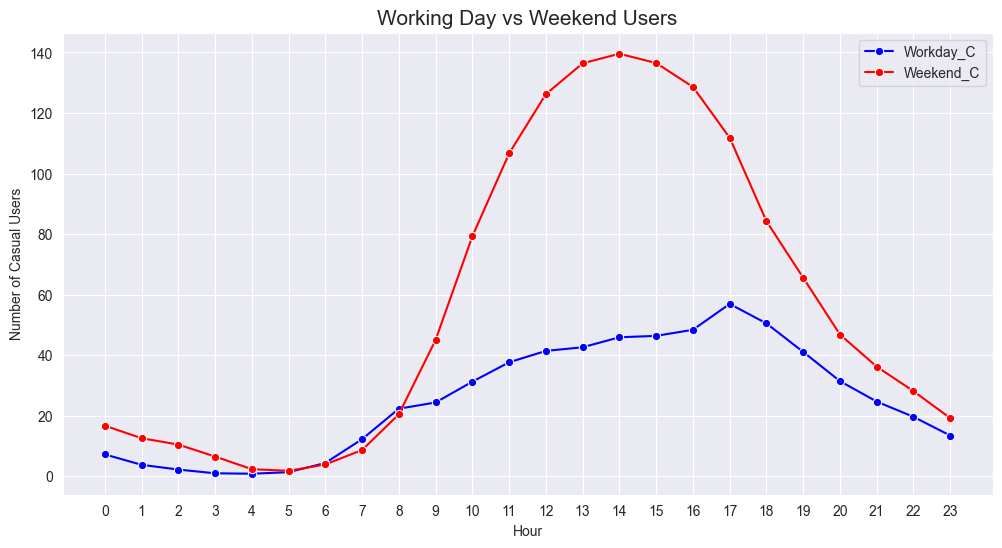

In [47]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Casual', data=workingday_avg_casual, label='Workday_C', color='blue', marker='o')
sns.lineplot(x='Hour', y='Casual', data=weekend_avg_casual, label='Weekend_C', color='red', marker='o')
plt.title('Working Day vs Weekend Users', size=15)
plt.xlabel('Hour')
plt.xticks(range(0, 24))
plt.ylabel('Number of Casual Users')
plt.legend()

plt.show()

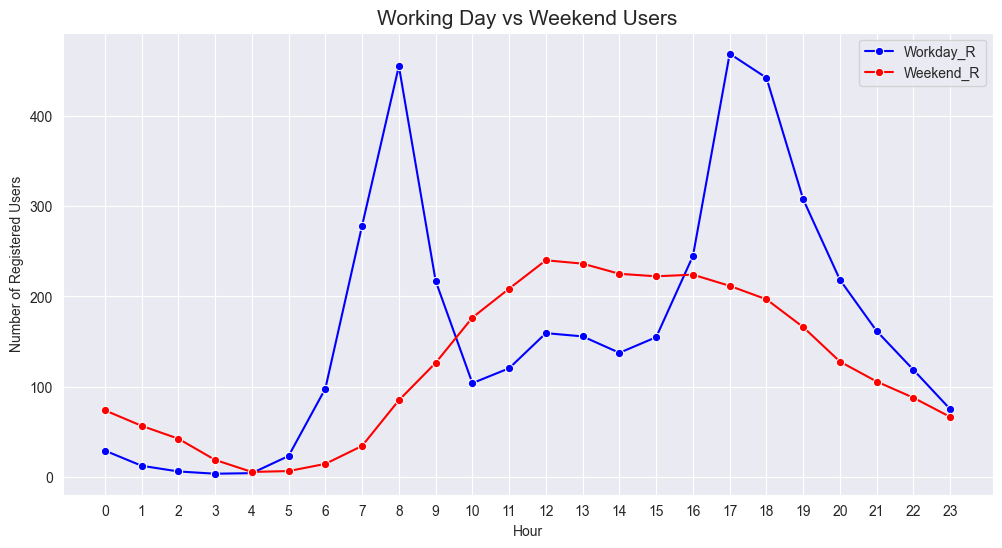

In [48]:
plt.figure(figsize=(12, 6))

sns.lineplot(x='Hour', y='Registered', data=workingday_avg_registered, label='Workday_R', color='blue', marker='o')
sns.lineplot(x='Hour', y='Registered', data=weekend_avg_registered, label='Weekend_R', color='red', marker='o')
plt.title('Working Day vs Weekend Users', size=15)
plt.xlabel('Hour')
plt.xticks(range(0, 24))
plt.ylabel('Number of Registered Users')
plt.legend()

plt.show()

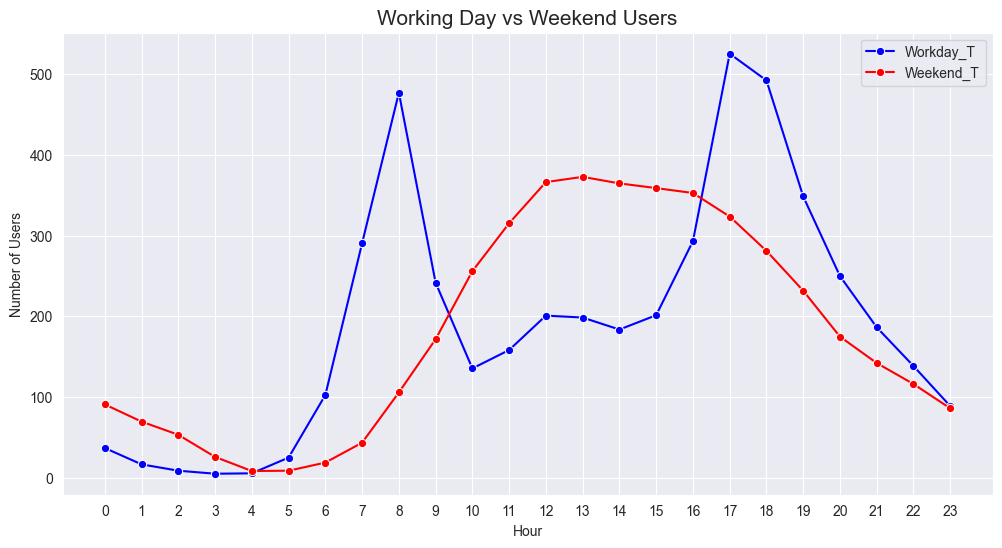

In [49]:
plt.figure(figsize=(12, 6))

sns.lineplot(x='Hour', y='Total User', data=workingday_avg_total, label='Workday_T', color='blue', marker='o')
sns.lineplot(x='Hour', y='Total User', data=weekend_avg_total, label='Weekend_T', color='red', marker='o')
plt.title('Working Day vs Weekend Users', size=15)
plt.xlabel('Hour')
plt.xticks(range(0, 24))
plt.ylabel('Number of Users')
plt.legend()

plt.show()

Plot diatas terdiri dari 3:
1. Plot user Casual terhadap jam aktifnya dalam sehari
2. Plot user Registered terhadap jam aktifnya dalam sehari
3. Plot user Total terhadap jam aktifnya dalam sehari

**Insight:**

1. Melalui plot 1, ditemukan bahwa user casual aktif paling tinggi saat weekend. Hal tersebut terlihat dengan titik puncak pada user casual ada pada saat weekend di jam 14.00 dengan rerata pengguna sebesar 140 pengguna.  
2. Melalui plot 2, ditemukan bahwa user registered aktif paling tinggi di saat weekday terutama di jam 08.00 dan jam 17.00 dengan rerata pengguna berturut-turut sebesar 454, dan 468 pengguna. Dapat disimpulkan bahwa pengguna registered dominan menggunakan bike sharing saat jam sibuk.
2. Melalui plot 3 dapat juga disimpulkan bahwa perilaku user bike sharing pada saat workday cenderung menyerupai user registered. Hal tersebut disebabkan oleh user casual yang lebih sedikit daripada user registered. Sedangkan pada weekend, keseluruhan user cenderung stabil kenaikan user yaitu meningkat mulai jam 07.00 (rerata 43 pengguna) hingga pada puncaknya jam 12.00 (rerata 366 pengguna) dan menurun setelah jam 16.00 (rerata 353 pengguna). Hal tersebut tergolong wajar karena pengguna yang menunjukkan hanya menggunakan bike sharing untuk mobilisasi santai di akhir pekan.


### Pertanyaan 3:  Bagaimana karakteristik pengguna casual vs registered berdasarkan jam dan berdasarkan setiap visualisasi data kapan sebaiknya melakukan promosi?

In [53]:
Hourly_data = hour_data.groupby(by=['Hour']).agg({
    'Casual': 'sum',
    'Registered': 'sum',
})
Hourly_data

,Casual,Registered
Hour,,
0,7375,31755
1,4709,19455
2,3412,12940
3,1893,6281
4,874,3554
5,1012,13249
6,3017,52115
7,8037,146134
8,15761,245240


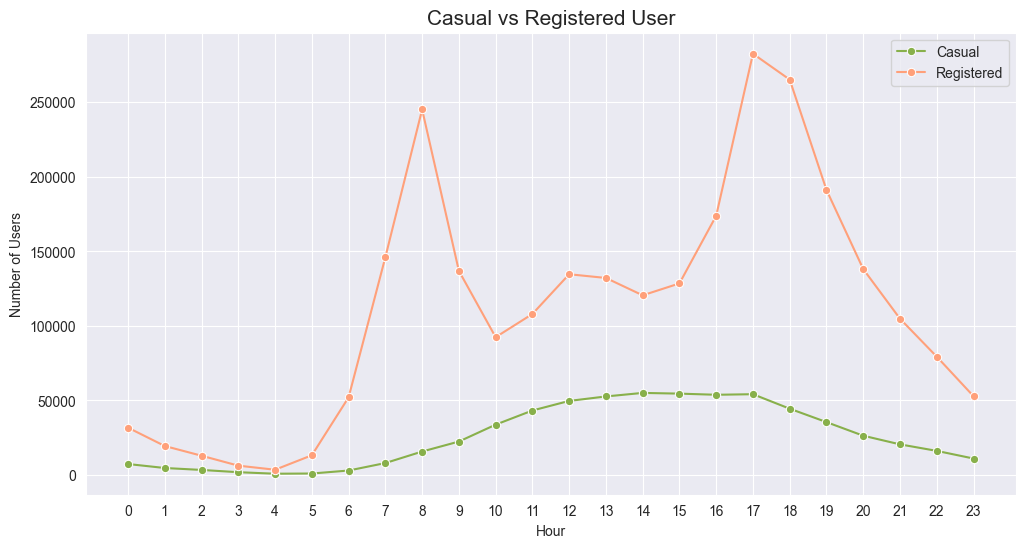

In [56]:
plt.figure(figsize=(12, 6))

sns.lineplot(x='Hour', y='Casual', data=Hourly_data, label='Casual', color='#88B04B', marker='o')
sns.lineplot(x='Hour', y='Registered', data=Hourly_data, label='Registered', color='#FFA07A', marker='o')
plt.title('Casual vs Registered User', size=15)
plt.xlabel('Hour')
plt.xticks(range(0, 24))
plt.ylabel('Number of Users')
plt.legend()

plt.show()

In [57]:
casual = hour_data.Casual.sum()
registered = hour_data.Registered.sum()

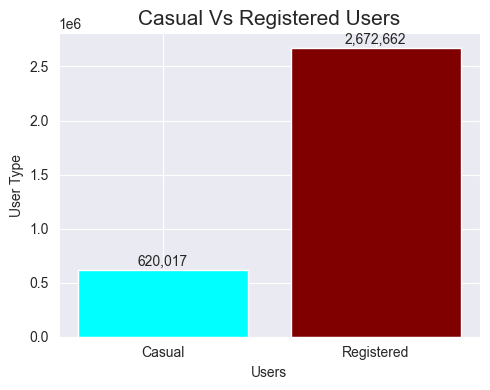

In [61]:
user_type = ['Casual', 'Registered']
datas = [casual, registered]
plt.figure(figsize=(5, 4))
plt.bar(user_type, datas, label='Casual', color=['cyan', 'maroon'], align='center')
plt.xlabel('Users')
plt.ylabel('User Type')
plt.title('Casual Vs Registered Users', size=15)
for i, value in enumerate(datas):
    plt.text(i, value + 10000, f'{value:,}', ha='center', va='bottom')
plt.tight_layout()

plt.show()

**Insight:**
- Berdasarkan plot karakteristik casual vs registered user, diketahui bahwa casual user secara umum tidak sebanyak registered dan karakter dari grafik user menunjukkan kenaikan yang cenderung santai. Terlihat bahwa user mulai ramai di jam sibuk seperti jam 06.00 meningkat hingga mencapai puncak di jam 14.00 sebanyak 55089 user dan terdapat penurunan sebelum naik kembali di jam sibuk (17.00). Setelah jam sibuk user casual tidak lagi terlihat aktif. Sedangkan jika meninjau registered user secara umum karakternya mirip dengan plot sebelumnya di plot perbandingan user registered di weekday dan weekend. Jika perusahaan ingin meningkatkan tingkat pengguna, promosi dapat dilakukan di jam tidak sibuk mulai 10.00 hingga jam 15.00.
- Berdasarkan distribusi pengguna diatas, dapat diketahui perbedaan yang cukup jauh antara user casual dengan registered. Dimana tercatat total user tipe casual di tahun 2011 dan 2012 adalah 620.017 dan user tipe registered sebesar 2.672.662 pengguna. 

## Conclusion

- Conclution pertanyaan 1: Pengguna bike sharing dipengaruhi oleh musim dan situasi cuaca saat itu. Karena dataset ini diambil di US, dengan karakteristik 4 musim di negara tersebut. User lebih memilih untuk menggunakan bike sharing di musim gugur/fall dan kurang diminati saat musim dingin. Selain itu, jika ditinjau berdasarkan cuaca user lebih menyukai kondisi cuaca yang Baik(Clear, Few clouds, Partly cloudy, Partly cloudy).  
- Conclution pertanyaan 2: Melihat kenyataan pada data yang ada, pengguna bike sharing tipe casual lebih aktif di weekend dan pengguna tipe registered lebih aktif di saat weekday.
- Conclution pertanyaan 3: Jika mengacu pada setiap data diatas, promosi dapat dilakukan untuk meningkatkan pengguna registered di hari libur/weekend. Dengan membuat promosi bagi setiap membership di setiap weekend pada jam jam sepi. Selain itu, untuk meningkatkan pengguna di musim musim tertentu seperti  musim semi dan musim gugur. Promosi dapat ditujukan bagi pengguna casual dengan memberikan promosi berupa gamification yang diintegrasikan dengan karakteristik musim tersebut.

In [62]:
hour_data.to_csv("D:\Data_Science_Dicoding\Data_Science_py\Tugas\submission\dashboard\hour_dataset.csv", index=False)

In [ ]:
!pipreqs D:\Data_Science_Dicoding\Data_Science_py\Tugas\Answer